<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#High-Speed,-Steady-State-Cornering" data-toc-modified-id="High-Speed,-Steady-State-Cornering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>High-Speed, Steady State Cornering</a></span><ul class="toc-item"><li><span><a href="#Vehicle-Kinetics-and-Kinematics-in-Steady-State-Turns" data-toc-modified-id="Vehicle-Kinetics-and-Kinematics-in-Steady-State-Turns-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vehicle Kinetics and Kinematics in Steady State Turns</a></span></li><li><span><a href="#Tires" data-toc-modified-id="Tires-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tires</a></span></li><li><span><a href="#Total-System-Level-Vehicle-Model" data-toc-modified-id="Total-System-Level-Vehicle-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Total System-Level Vehicle Model</a></span></li><li><span><a href="#A-tire-model-based-on-tire-test-data" data-toc-modified-id="A-tire-model-based-on-tire-test-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>A tire model based on tire test data</a></span></li><li><span><a href="#Function:-get-tire-force-from-tire-force-data-using-interpolation" data-toc-modified-id="Function:-get-tire-force-from-tire-force-data-using-interpolation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Function: get tire force from tire force data using interpolation</a></span></li><li><span><a href="#Getting-individual-steer-angles-from-handwheel-angle" data-toc-modified-id="Getting-individual-steer-angles-from-handwheel-angle-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Getting individual steer angles from handwheel angle</a></span></li><li><span><a href="#Kinematic-Model-for-generating-Slip-Angles" data-toc-modified-id="Kinematic-Model-for-generating-Slip-Angles-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Kinematic Model for generating Slip Angles</a></span></li><li><span><a href="#Set-up-vehicle-properties" data-toc-modified-id="Set-up-vehicle-properties-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Set up vehicle properties</a></span></li><li><span><a href="#Function:-Get-Vertical-Loads-from-SS-Pair-Analysis" data-toc-modified-id="Function:-Get-Vertical-Loads-from-SS-Pair-Analysis-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Function: Get Vertical Loads from SS Pair Analysis</a></span></li></ul></li><li><span><a href="#Solving-for-steering-angle-and-lateral-velocity-using-a-Newton-Raphson-Algorithm" data-toc-modified-id="Solving-for-steering-angle-and-lateral-velocity-using-a-Newton-Raphson-Algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solving for steering angle and lateral velocity using a Newton Raphson Algorithm</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Function:-Calculate-Constraints" data-toc-modified-id="Function:-Calculate-Constraints-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Function: Calculate Constraints</a></span></li><li><span><a href="#Function:-Calculate-the-Jacobian" data-toc-modified-id="Function:-Calculate-the-Jacobian-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Function: Calculate the Jacobian</a></span></li><li><span><a href="#Function:-Iterate-Once" data-toc-modified-id="Function:-Iterate-Once-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Function: Iterate Once</a></span></li><li><span><a href="#Function:-Solve-NR" data-toc-modified-id="Function:-Solve-NR-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Function: Solve NR</a></span></li><li><span><a href="#Test-Newton-Raphson-solution:-Solve-for-$\delta_{hw}$-and-V-given-U,R,Car" data-toc-modified-id="Test-Newton-Raphson-solution:-Solve-for-$\delta_{hw}$-and-V-given-U,R,Car-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Test Newton Raphson solution: Solve for $\delta_{hw}$ and V given U,R,Car</a></span></li></ul></li><li><span><a href="#Find-Max-Speed-around-a-Given-Turn-of-Radius-&quot;R&quot;" data-toc-modified-id="Find-Max-Speed-around-a-Given-Turn-of-Radius-&quot;R&quot;-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find Max Speed around a Given Turn of Radius "R"</a></span></li><li><span><a href="#Case-Study:-Maximum-speed-vs.-turn-radius" data-toc-modified-id="Case-Study:-Maximum-speed-vs.-turn-radius-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Case Study: Maximum speed vs. turn radius</a></span></li><li><span><a href="#Case-Study:-Balancing-Roll-Stiffnesses" data-toc-modified-id="Case-Study:-Balancing-Roll-Stiffnesses-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Case Study: Balancing Roll Stiffnesses</a></span></li></ul></div>

# High-Speed, Steady State Cornering

**This is a DRAFT!! I Make no guarantees about the accuracy of the equations and code in this notebook**

written by: Alexander Brown, PhD www.alexanderallenbrown.com**

In this notebook, the challenge is to determine the maximum speed your vehicle can travel around a turn of a given radius, $R$.


We would like to develop a model that takes important tire and vehicle properties and produces a *maximum* speed around which the car can navigate the turn.
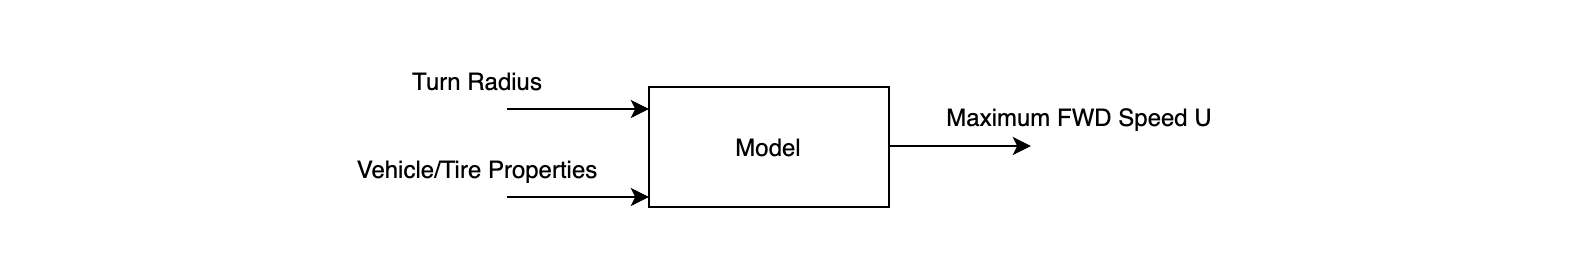




The model we will develop captures many of the key elements of race car design and tuning you may wish to play with, including:

* weight distribution front/rear
* suspension geometry and spring selection
* roll stiffness and roll stiffness distribution
* steering geometry (Ackermann percentage)
* tire selection

In order to build this model, we will need to model the vehicle at several different hierarchical levels. We want the model of each of the vehicle's relevant subsystems to capture the effects above, because these are often changed by race engineers to tune the performance of their vehicles. 


In general, the task of racing is fairly complex, with information and power exchanged in a number of different ways between the driver, the track, and the vehicle.

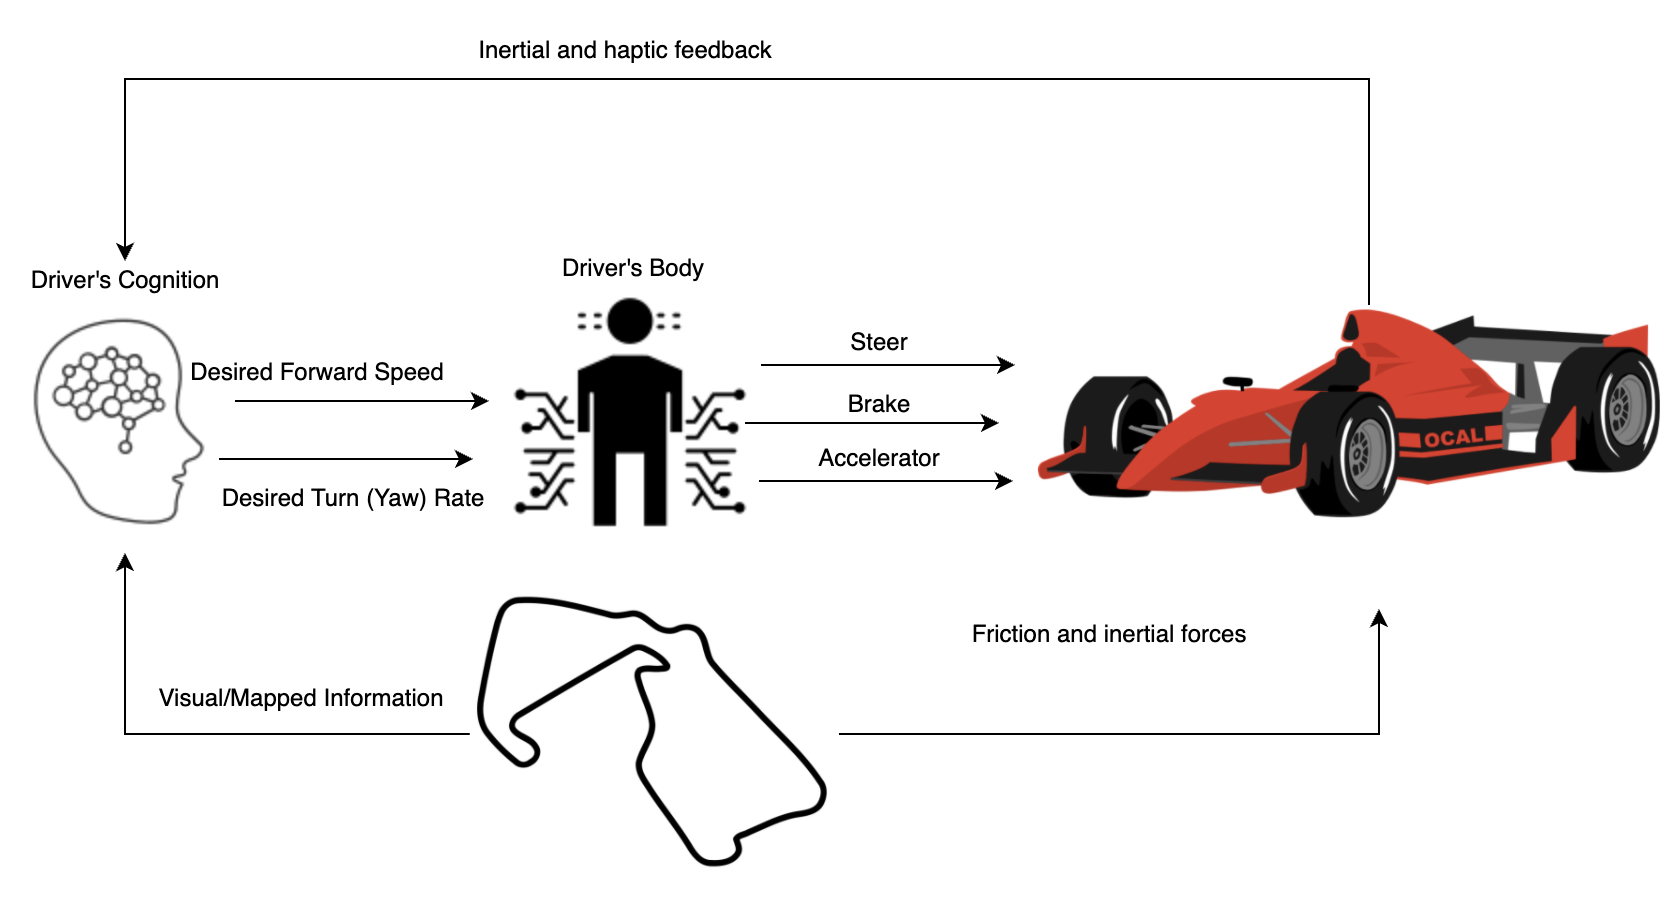

For our purposes here, we will focus only on the vehicle. We will assume that our driver is able to "perfectly" select a forward speed and steering angle to make the car go around a turn at the limit of friction. We will also assume that the racetrack itself is flat, and that the driver is *only* cornering (not trailbraking, for example). This simplifies our analysis **a lot**, but there is still quite a bit involved. Breaking the model above out to look only at the vehicle, the inputs and outputs look a bit like the figure below **if we limit our discussion** to cases where the vehicle's forward speed $U$ is constant.

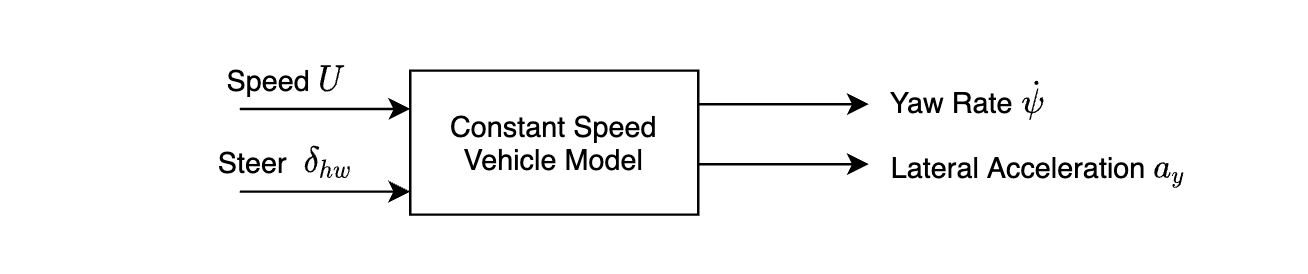

As the figure above shows, when the driver selects a speed and turns the handwheel by $\delta_{hw}$ radians (or degrees), the vehicle settles into a turn. At **steady state**, these values will be constant (after transient effects from the suspension, tires, and vehicle inertia have subsided). Inside of this model, we will consider basic representations of the following vehicle subsystems that will contribute to the magnitude of the model's outputs given the driver's inputs.

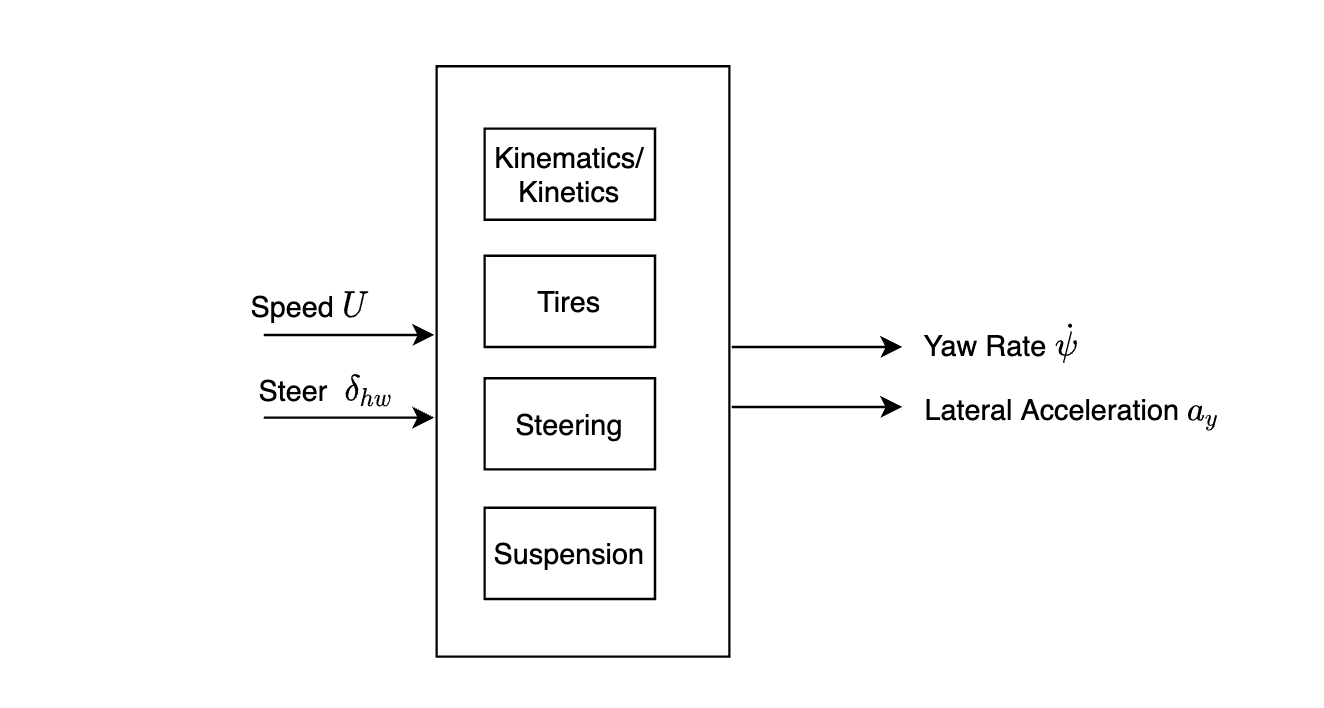

With this model scope in hand, and understanding that each of these subsystems has complex effects we will need to explore, we can proceed.

To begin to understand what is required to make the vehicle go around a turn, we will begin with a high-level overview of the forces that are involved, and apply Newton's laws. This will enable us to understand *how* the vehicle goes around a turn at all. This is the study of the vehicle's *kinetics* as it goes around the turn.

## Vehicle Kinetics and Kinematics in Steady State Turns

We will begin by looking at a top view of the vehicle. Steering angles $\delta$, slip angles $\alpha$, and lateral tire forces $F_y$ are all labeled in the figure below, which shows a vehicle navigating a turn with radius $R$ in plan view.
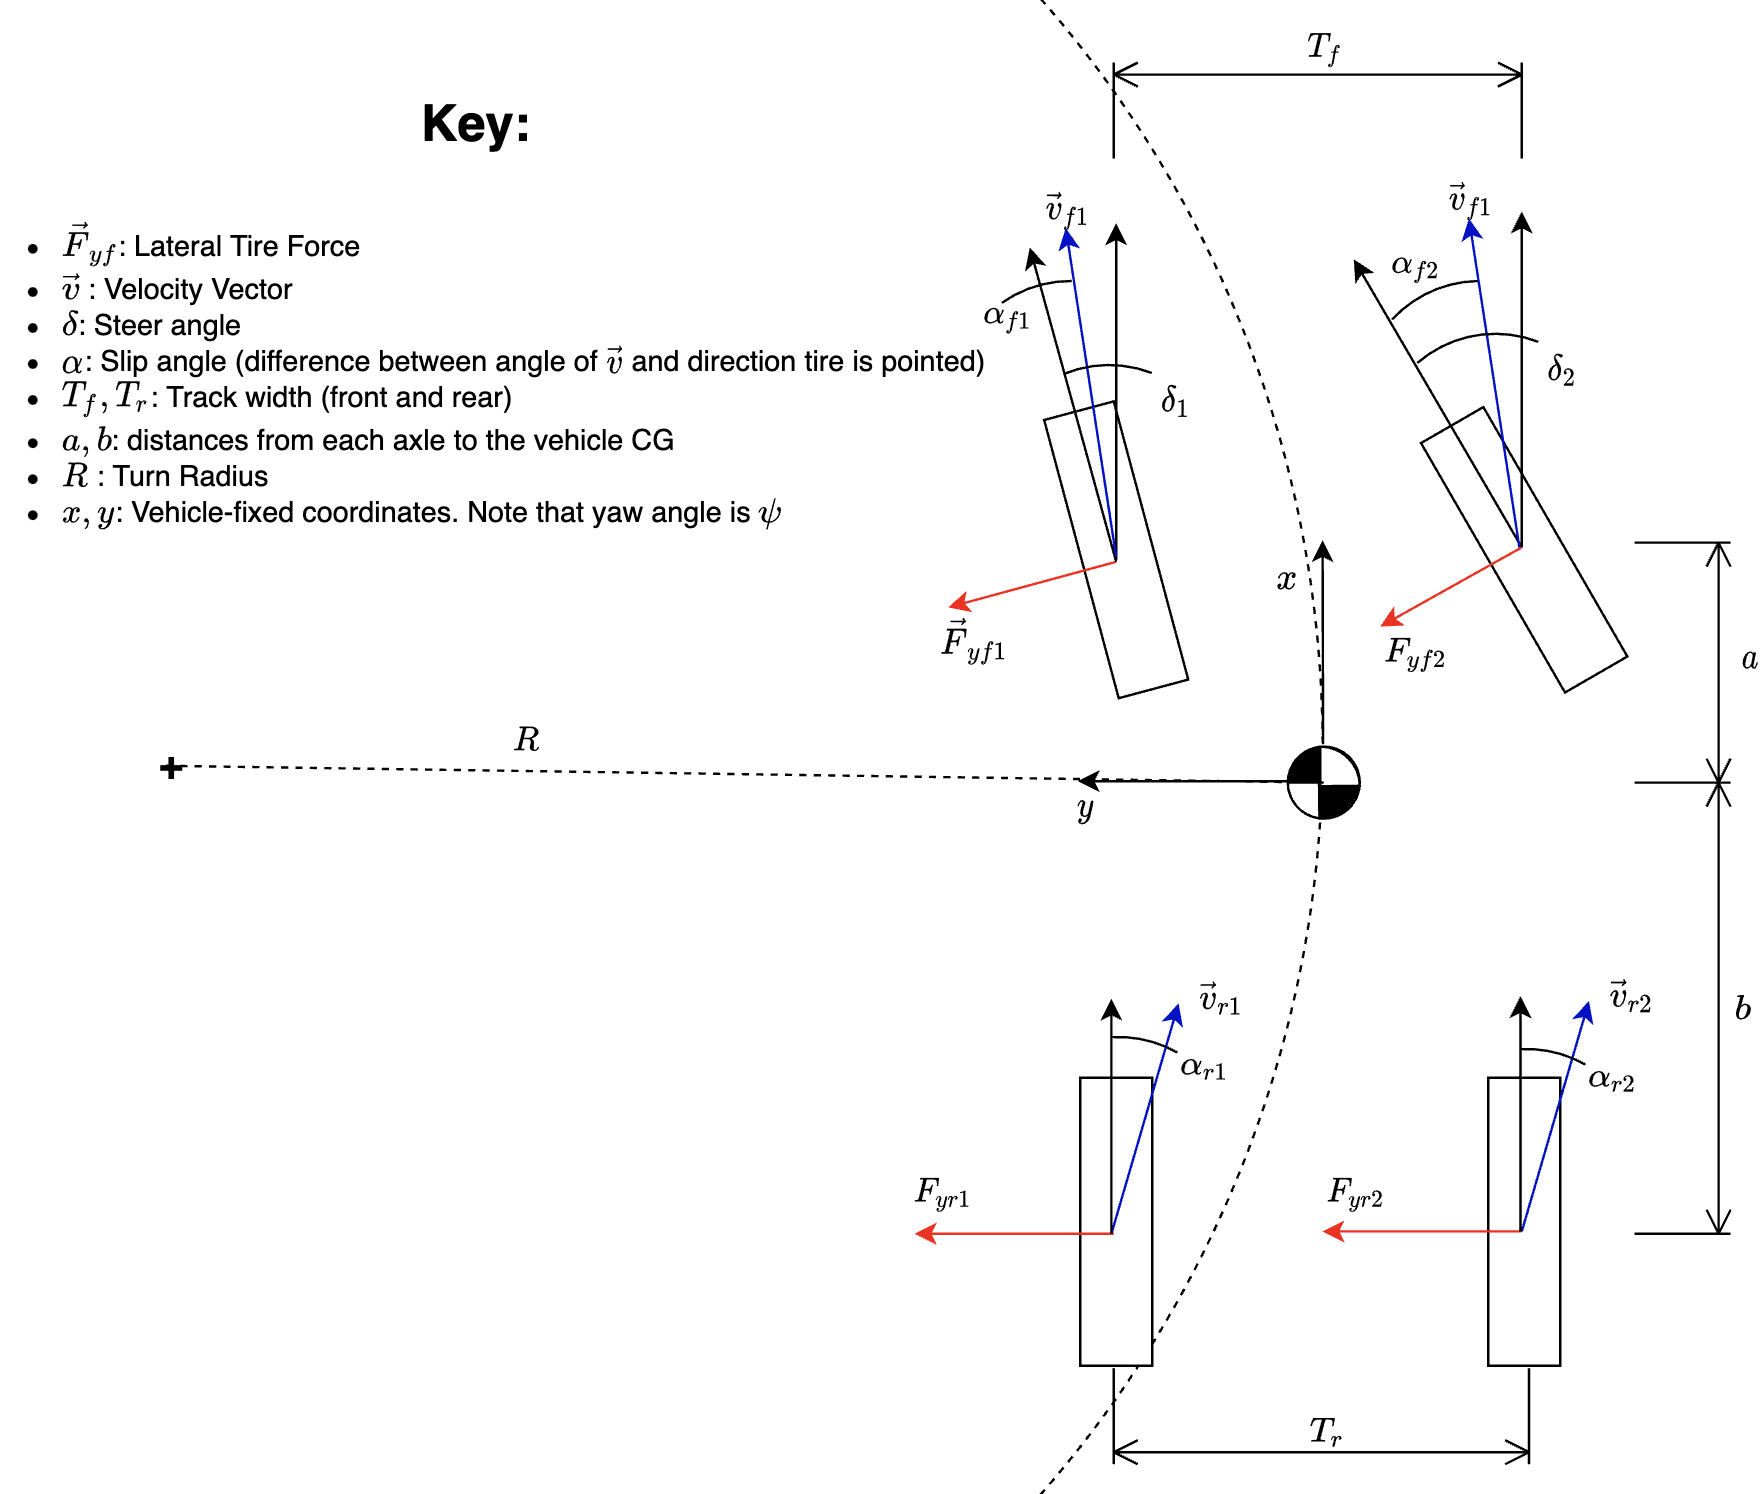

Generally, a vehicle's CG is said to move in-plane with the velocity:

$$\vec{v} = U\hat{\imath}+V\hat{\jmath}$$

$U$ is the vehicle's forward velocity in its local $x$-direction, and $V$ is the vehicle's *lateral* velocity. Normally people think about lateral velocity as a result of tire slip... however, even a vehicle with no (or negligible) tire slip will in general have some lateral velocity at its CG in general, due to simple rigid body kinematics. Recall that the velocity of a point $p$ on some rigid body is always given by $\vec{v}_p = \vec{v}_o + \vec{\omega}\times \vec{r}_{p/o}$. This means that if the vehicle rotates in the yaw-direction with $\vec{\omega} = \dot{\psi} \hat{k}$, that even if the rear axle (call it point $o$) has no lateral velocity, the CG will!

As the vehicle goes around a turn, if it is at *steady state*, then $\dot{U}$ and $\dot{V}$ and $\ddot{\psi}$ will all be zero. The vehicle's acceleration will be purely centripetal, and thus only in the local j-direction.

$$\left(\frac{d}{dt}\vec{v}\right)\cdot \hat{\jmath} =a_y = \frac{U^2}{R}$$

With $R$ the vehicle's turn radius. By the arc length formula, we also know that the yaw rate is given by:

$$\dot{\psi} = \frac{U}{R}$$

Note that these last two equations are scalars without signs.... for the purposes of this analysis, we will assume we are only dealing with left-hand turns where steering angles $\delta$ are positive, leading to positive $a_y$ and $\dot{\psi}$ as well.

This means that if the car is in a turn, the sum of the forces in the lateral direction must balance with the car's centripetal acceleration $a_y$, and the sum of the moments about the yaw axis must be zero. This is a direct consequence of Newton's laws. 

$$F_{yf1}\cos \delta_1 + F_{yf2}\cos \delta_2 + F_{yr1} + F_{yr2} - m\frac{U^2}{R} = 0$$
$$a\left(F_{yf1}\cos \delta_1 + F_{yf2}\cos \delta_2\right) + \frac{T_f}{2}\left(F_{yf1}\sin \delta_1 - F_{yf2}\sin \delta_2\right) - b\left(F_{yr1} + F_{yr2}\right) = 0$$


An updated system-level diagram of our model is presented below.

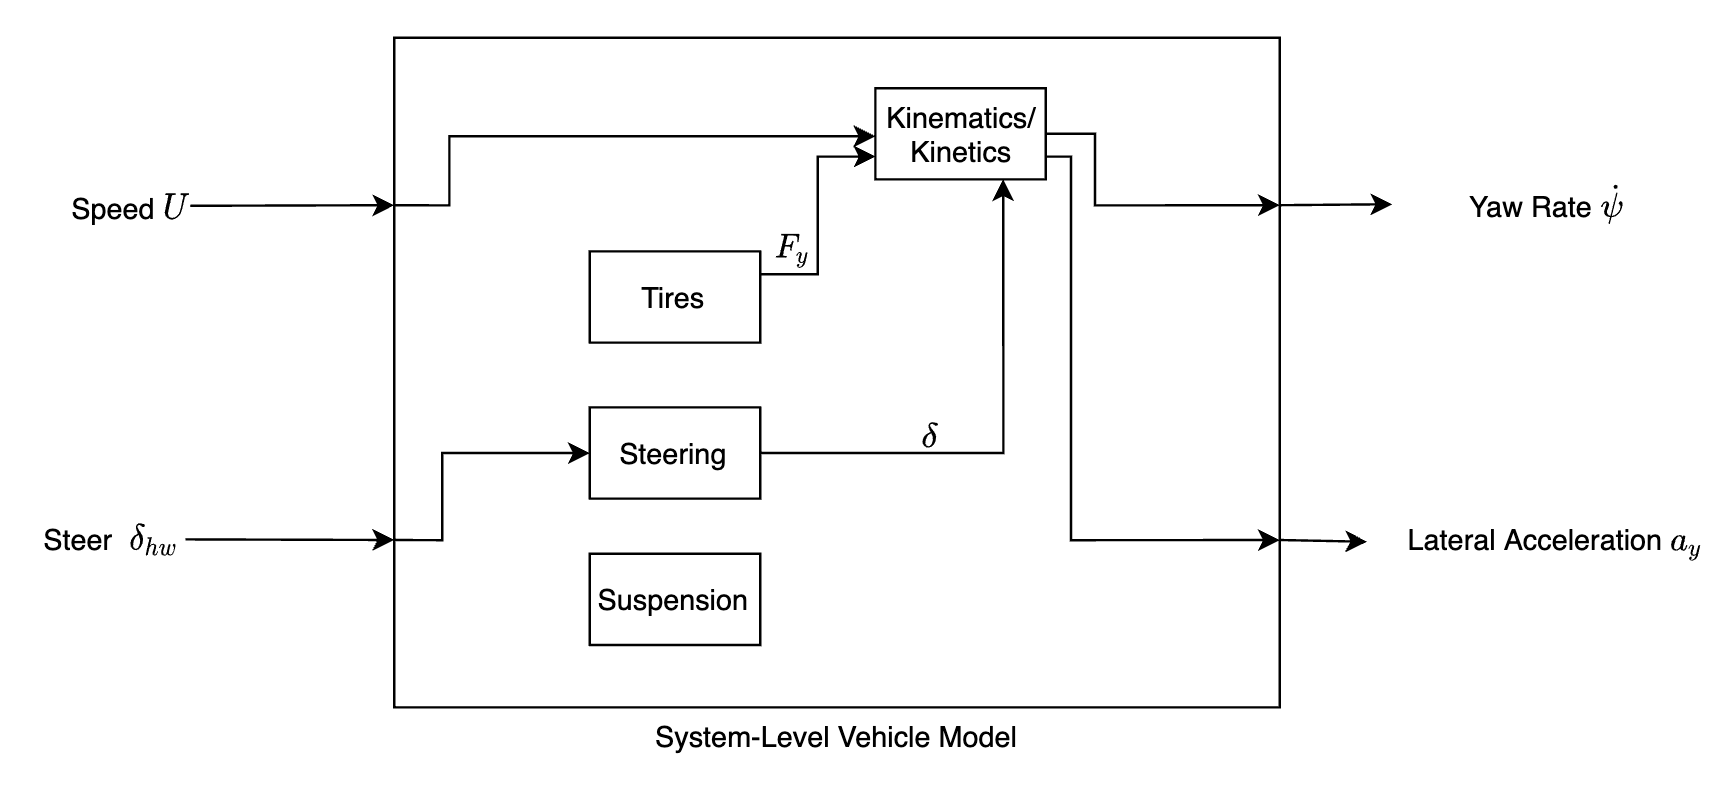

Above, we can see now how tire forces, forward speed, and steering wheel angle all contribute to the vehicle's path around a turn. As you might imagine, Enforcing our kinetic and kinematic equations requires more knowledge of tire forces! Some information about how tires generate lateral force is presented in the next section; the specific ways that tires are influenced by steering and suspension effects will be presented as needed.

## Tires 

Tires are a key part of determining how fast a car can navigate a turn. A tire's ability to provide lateral (left/right) force is what produces the centripetal forces that keep a vehicle in a turn. 

A tire's lateral force is generated when the tire's velocity vector is misaligned with the direction it is pointing. This alignment is often expressed as a "slip angle" $\alpha$. Other factors that influence a tire's ability to produce lateral force include road surface friction, tire pressure, camber, and how much vertical load the tire is subjected to. If we have data about our tire, we can use either a numerical model of these effects **or** a table and interpolation to determine how much force our tire can produce at any moment. An animation using a parametric model of tire forces is shown below. Explore the effects of vertical load and slip angle on tire force in the lateral (left-right) and longitudingal (front-back) directions.

In [22]:
%%html
<iframe id="inlineFrameExample" title="Inline Frame Example" width="1000" height="600" src="https://workbench.lafayette.edu/~brownaa/tire_animation.html"> </iframe>

While effects like longitudinal slip (which we are deliberately not addressing), tire pressure, camber, temperature, and wear also affect a tire's ability to produce lateral force, we can build a reasonable model of a tire's lateral force as depending on the suspension to provide estimates of vertical forces $F_z$ for each tire as a function of lateral acceleration, and from our vehicle kinematics vehicle model to provide estimates of slip angle given the vehicle's steering and motion. This leads to an updated system-level diagram of our vehicle model as shown below.

## Total System-Level Vehicle Model

Given what we now know about the factors that influence overall motion (namely, tire forces and Newton's Laws) and now that we have some understanding about what tire forces depend on, we can update our system-level model of the vehicle as shown in the following figure.

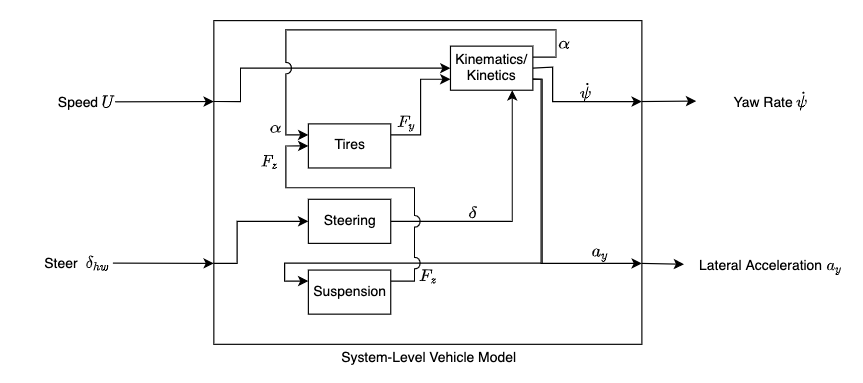

You will probable notice a potentially confusing web of inter-dependency between these vehicle subsystems. This interdependency means that even if we can build individual subsystem models for suspension, steering, tires, and kinematics, the inputs of one may still depend on the outputs of another. For a system that has reached steady state, this leads to a complex, nonlinear system of equations that will be very difficult to solve in closed form. 

This is a problem, but our approach will be to use an iterative numerical method for finding the solution to a system of nonlinear equations. We will be using the "Newton Raphson" algorithm. This uses "guesses" of key "degrees of freedom" (unknown inputs, outputs, and/or internal parameters) to determine how close a set of "constraint equations" (our Newton's Laws equations) are to being satisfied-- the algorithm iteratively modifies our guesses at the subsystem level to arrive at a configuration of tire forces, steering angle, and kinematic variables that satisfy Newton's Laws and describe the vehicle's state in a turn accurately.

To work towards a set of individual subsystem models, which we will build as MATLAB functions, we will start with the tires.

While the parametric model in the web-app you saw in a preceding section is informative, it is much more common for a race team to have access to tire test data. Tire test data showing lateral force as a function of variables like slip angle and vertical load is common, and it is possible to use 2D interpolation to build a model of a tire from the data itself!! 

## A tire model based on tire test data

Tire testing is an expensive and complex process, but it is possible to obtain tire data either from a manufacturer or a [tire test consortium](https://www.millikenresearch.com/fsaettc.html). Below you can see how tire test data are obtained that relate slip angle, vertical load, and other setup parameters to tire lateral force.

In [23]:
%%html
<iframe width="900" height="540" src="https://www.youtube.com/embed/jJXAmri-Toc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Once test data are obtained, we can post-process them to show us a 3D "surface" that relates vertical load and slip angle to available lateral force, as shown in the cell below. We can also, as the cell shows, **use the table itself** as a "model" by employing 2-dimensional interpolation. Using this interpolation will allow us to create a purely data-based model of tire forces, which we can employ in our system-level vehicle diagram.

qforce =  3596.1


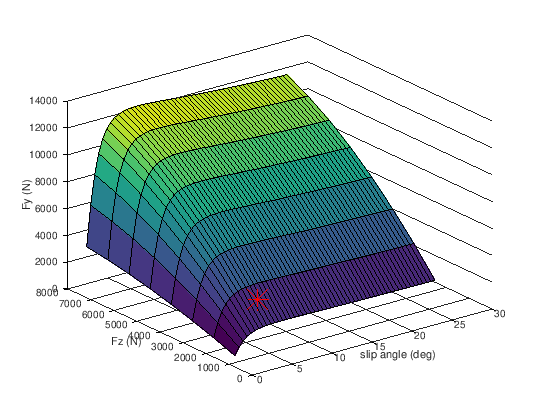

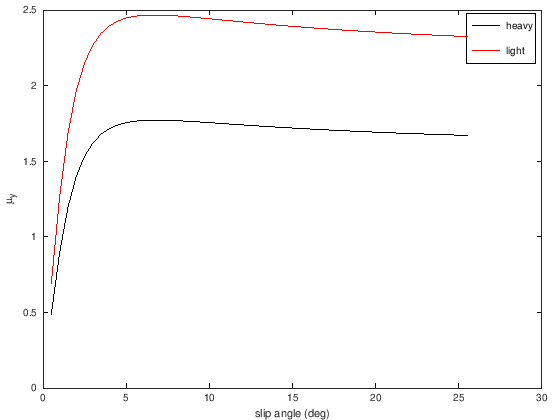

In [24]:
close all
clear all
clc

%First line is vertical loads (N)
%first column is slip angles
tire_fy = load('tire_fy.txt');

%% process lateral forces;
%get parameters
loads = tire_fy(1,2:end);
slips = tire_fy(2:end,1);
forces = tire_fy(2:end,2:end);

loads_matrix = ones(size(slips))*loads;

%surface plot
surfloads = transpose(loads'*ones(1,length(slips)));
surfslips = slips*ones(1,length(loads));
surf(surfslips',surfloads',forces')
ylabel('Fz (N)')
xlabel('slip angle (deg)')
zlabel('Fy (N)')

hold on

%say we wanted tire force at some known slip and load value.
qalph = 5; %degrees
qload = 1500; %N

%We could use interpolation to find a force at this particular slip and load
qforce = interp2(slips,loads,forces',qalph,qload,'spline')

%plot our tire force on this mesh
plot3(qalph,qload,qforce,'r*','MarkerSize',20)

figure
plot(slips,forces(:,end)./loads(end),'k',slips,forces(:,1)./loads(1),'r')
xlabel('slip angle (deg)')
ylabel('\mu_y')
legend('heavy','light')

As the first, surface plot shows, we can use interpolation to find the lateral force at any intermediate vertical load and slip angle. As the second plot shows, our tires' coefficient of friction **Decreases substantially** when we load the tire heavily. Because we know that the outside tire in a turn is more heavily loaded than the inside tire, we can see that our cornering ability will be drastically decreased if we have too much lateral load transfer in a turn. 

Putting all of this together, we can create a simple function that uses our dataset to produce tire force estimates given a particular vertical load on that tire and its slip angle. We also need a consistent way to **load** tire data into our table, and the function below does that for us. As you will notice, it also scales the entire dataset to accommodate road surfaces with different ultimate (maximum) friction coefficient values (the values you get from a tire test machine may often be substantially higher than the values you'd get on a wet or deteriorated track surface!

In [25]:
function [TireData] = loadTireData(fname,mu_max)
    % load tire data
    tire_fy = load(fname);
    loads = tire_fy(1,2:end);
    slips = tire_fy(2:end,1);
    forces = tire_fy(2:end,2:end);
    %calculate the tires' nominal maximum friction (during test)
    mu_nominal = max(forces(:,1)/loads(1));
    %load these variables into a structure for ease of use.
    TireData.loads = loads;
    TireData.slips = slips*pi/180; % CONVERT TO RADIANS
    %scale entire tire forces according to the mu max parameter
    TireData.forces = forces*mu_max/mu_nominal;
endfunction

## Function: get tire force from tire force data using interpolation

Once we have a tire dataset loaded, we can use the following function as our "tire model" in the vehicle system-level model:

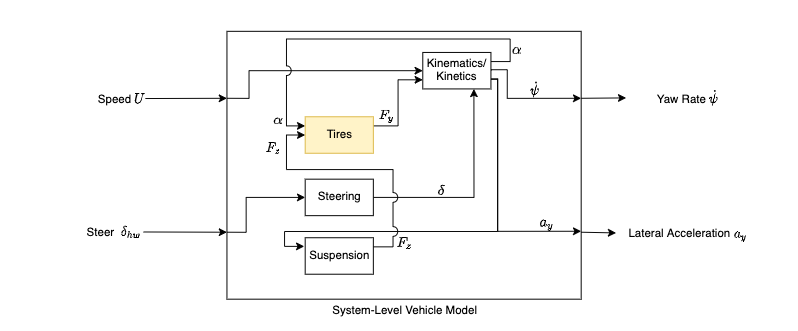

In [26]:
% This function relies on a global TireData object (above).
function [Fy] = getTireFy(Fz,alpha,TireData)
    Fy = interp2(TireData.slips,TireData.loads,TireData.forces',alpha,Fz,'spline');
endfunction

As with any function we write, we should write a small piece of code to **unit test** that function. A script that you can use to test the tire model is shown below.

In [27]:
TireData = loadTireData('tire_fy.txt',1.2);
qalph = 3.2*pi/180; %RADIANS.
qload = 500; %N

%We could use interpolation to find a force at this particular slip and load
qforce = getTireFy(qload,qalph,TireData)
%note that because the function uses spline interpolation, it can also extrapolate beyond the bounds o

qforce =  567.93


Now that we have a model for each of our vehicle's tires, we will need to understand *what* our slip angles actually are. As you have seen in our overall vehicle kinematic/kinetic diagram, the front wheels' slip angles depend heavily on the *steer angle* of each wheel, which often varies from the left to the right wheel according to the steering system's geometry. We will use an interpolation-based method as our model of the vehicle's steering system, as presented in the next section.

## Getting individual steer angles from handwheel angle

In general, the left and right wheels do not steer the same amount for a given handwheel angle. A table relating handwheel angle to roadwheel angles can be obtained from kinematics software. A plot in tabular form obtained for a formula-style car is shown below. It was obtained using the default settings in the [LafKin Simulator](https://alexanderallenbrown.github.io/LafKin/).

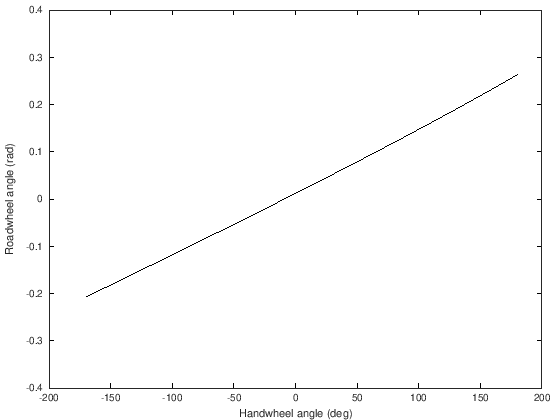

In [28]:
steerdata = load("Steer_vs_HandWheel.txt");
figure
plot(-steerdata(:,1),steerdata(:,2),'k')
xlabel('Handwheel angle (deg)')
ylabel('Roadwheel angle (rad)')

This simulation is for the left tire of a car. It is important to watch the sign convention... here, the sign of the handwheel angle was originally opposite of the sign of the roadwheel angle (you can see this in the simulation). So this means that we needed to flip the signs. 

With the signs flipped, steering the wheel in the negative direction (CW) makes the car turn right with a negative roadwheel angle. Steering the wheel in the positive direction (CCW) makes the car turn left. When turning left, the inside (left) wheel turns *more* than the outside wheel. This means the car has something close to "Ackermann" geometry as configured. We will split this dataset into two-- one for the inside wheel, and one for the outside wheel. This way, we can continue to consider left turns positive, and get an "inside" steering angle and an "outside" steering angle we can then use when computing tire force data (since slip angles depend on steer!!). As we progress towards a model of the steering system we need a function that reliably loads and pre-processes steering data from a kinematics package to give us left and right roadwheel angles as a function of steering wheel angle.

In [29]:
function [steer_inside,steer_outside] = loadSteerData(fname)
    %load raw data with columns [handwheel, roadwheel]
    steerdata = load(fname);
    %check to see if signs need to be flipped. Assume that data start with a LEFT handwheel angle
    if(sign(steerdata(end,1)/steerdata(end,2))==-1)
        steerdata(:,1) = -steerdata(:,1);
    end
    %now split the data. inside wheel should now be where the handwheel angle is >0
    steer_inside = steerdata(steerdata(:,1)>=0,:);
    steer_outside = abs(steerdata(steerdata(:,1)<=0,:));
endfunction

As before, we should write a script to test this function independently to make sure it works as expected. The following script loads steering data and then plots individual left and right roadwheel angles vs. handwheel angle.

ans =  11.932


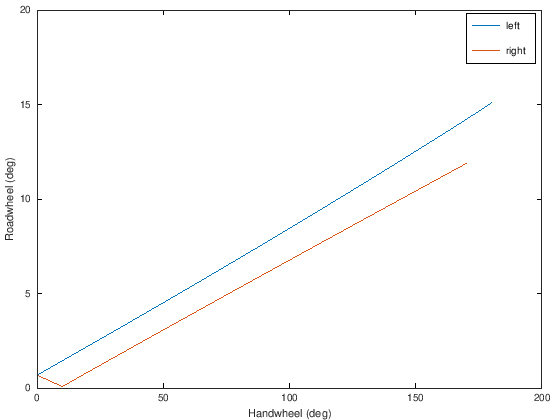

In [30]:
[steer_left,steer_right] = loadSteerData('Steer_vs_HandWheel.txt');
figure
plot(steer_left(:,1),steer_left(:,2)*180/pi,steer_right(:,1),steer_right(:,2)*180/pi);
xlabel('Handwheel (deg)')
ylabel('Roadwheel (deg)')
legend('left','right')

steer_left(1,1)/(steer_left(1,2)*180/pi)

We can functionalize this below, and use interpolation as our "Steering Model" in our vehicle system-level diagram. Given a handwheel angle $\delta_{hw}$, we can calculate the individual steering angles $\delta$ for the left and right wheels.

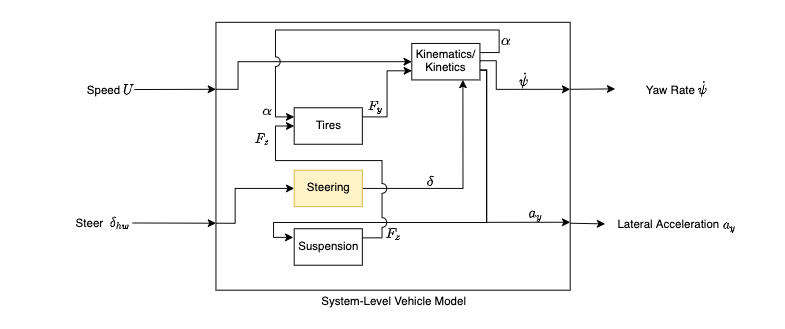

In [31]:
function [delta_1, delta_2] = getSteerAngles(delta_HW,steer_left,steer_right)
    delta_1 = interp1(steer_left(:,1),steer_left(:,2),delta_HW,'extrap');
    delta_2 = interp1(steer_right(:,1),steer_right(:,2),delta_HW,'extrap');
endfunction

Let's test this function. The following script loads steer data, and then queries the model for left and right roadwheel angles given a particular handwheel angle. It produces a plot that shows the results.

d1 =  0.14746
d2 =  0.11812


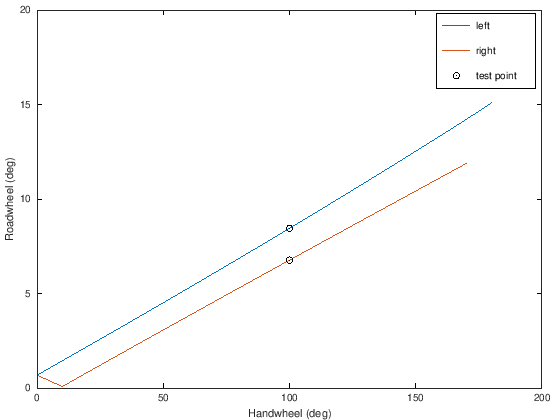

In [32]:
[steer_left,steer_right] = loadSteerData('Steer_vs_HandWheel.txt');

HW = 100;%query handwheel angle, degrees
[d1,d2] = getSteerAngles(HW,steer_left,steer_right)

figure
plot(steer_left(:,1),steer_left(:,2)*180/pi,steer_right(:,1),steer_right(:,2)*180/pi,[HW HW],[d1,d2]*180/pi,'ko');
xlabel('Handwheel (deg)')
ylabel('Roadwheel (deg)')
legend('left','right','test point')

As we can see, we now have the ability to input a handwheel angle and get out the two roadwheel angles!

The purpose of a good steering model is to use it in the calculation of our vehicle's **slip angles**, which are required to produce tire force data. Slip angles are presented in the next section.

## Kinematic Model for generating Slip Angles

As we've discussed, a tire's slip angle is the difference between where the tire is pointed and where it is heading. A plan view of one of the vehicle's tracks (left) is shown below.

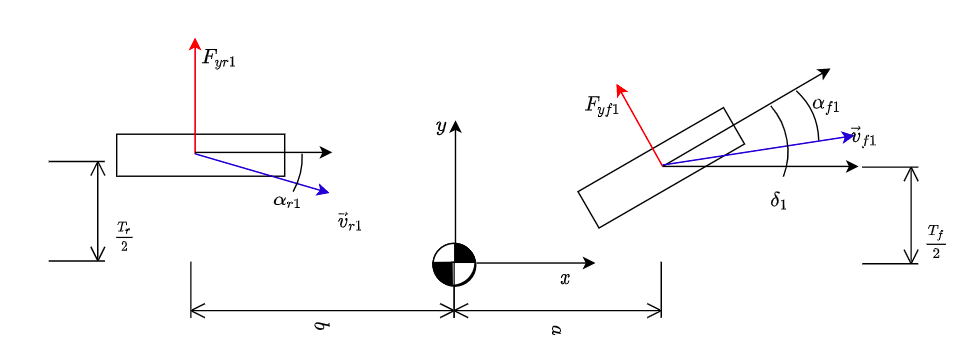

We have seen before that the vehicle's CG is assumed to have the following velocity vector:

$$\vec{v} = U\hat{\imath}+V\hat{\jmath}$$

Using the familiar relative velocity equation $v_b = v_a + \vec{\omega}\times\vec{r}_{b/a}$, we can write the velocity of the front left tire as:

$$\vec{v}_{f1} = U\hat{\imath}+V\hat{\jmath} + (\dot{\psi}\hat{k})\times(a\hat{\imath} + \frac{T_f}{2}\hat{j})$$

This comes out to:

$$\vec{v}_{f1} = (U - \frac{T_f}{2} \dot{\psi} )\hat{\imath}+(V+a\dot{\psi})\hat{\jmath}$$

Then, we can compute the slip angle of the front left tire by taking the inverse tangent of the y over the x component of its velocity, and then subtracting the steering wheel angle on that tire:

$$\alpha_{f1} = \tan^{-1} \left( \frac{V+a\dot{\psi}}{U - \frac{T_f}{2} \dot{\psi}} \right)-\delta_{f1}$$

The right front tire's slip angle can be computed similarly:

$$\alpha_{f2} = \tan^{-1} \left( \frac{V+a\dot{\psi}}{U + \frac{T_f}{2} \dot{\psi}} \right)-\delta_{f2}$$

The rear tires have slip angles that are similarly computed, considering that their steer angles are 0:

$$\alpha_{r1} = \tan^{-1} \left( \frac{V-b\dot{\psi}}{U - \frac{T_f}{2} \dot{\psi}} \right)$$
$$\alpha_{r2} = \tan^{-1} \left( \frac{V-b\dot{\psi}}{U + \frac{T_f}{2} \dot{\psi}} \right)$$

This can be functionalized as follows to fit into our system-level vehicle model as part of the "Kinematics/Kinetics" subsystem.

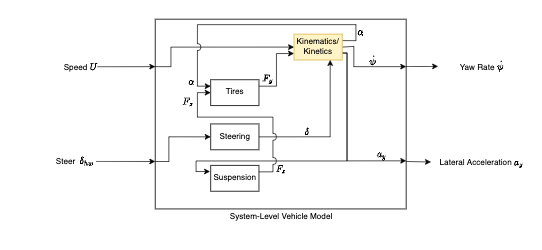

In [33]:
function [alpha_f_left,alpha_f_right,alpha_r_left,alpha_r_right] = getSlipAngles(Car,U,R,V,HW)
    %assumes rear slip angles are the same.
    %call function to find our two roadwheel steer angles.
    [delta_left,delta_right] = getSteerAngles(HW,Car.steer_left,Car.steer_right);
    %compute yaw rate
    psidot = U/R;%U is fwd speed in m/s, R is turn radius in m.
    %now compute our slip angles
    alpha_f_left = atan((V+Car.a*psidot)/(U-Car.Tf/2*psidot))-delta_left;%from geometry
    alpha_f_right = atan((V+Car.a*psidot)/(U+Car.Tf/2*psidot))-delta_right;%from geometry
    alpha_r_left = atan((V-Car.b*psidot)/(U-Car.Tf/2*psidot));
    alpha_r_right = atan((V-Car.b*psidot)/(U+Car.Tf/2*psidot));
endfunction

Now that we have a full model of how steering input and vehicle kinematics interact to produce tire slip angles, we need to know what the vertical load on each tire is to complete our model of how tire forces are affected by our driver's inputs $\delta_{hw}$ and $U$. To do this, we first need to create a structure to hold the vehicle's key parameters. These parameters will help us compute vertical tire loads in a later section.

## Set up vehicle properties

We are beginning to see quite a few vehicle properties (tires, steering, etc) popping up. To keep things clean and organized, we will use a *structure* to hold all of these properties. The cell below sets up a function that loads static (unchanging) vehicle properties. Some of these you will recognize, and some we will not deal with until slightly later.

In [34]:
function Car = loadCar(tirefile,steerfile)
    Car.a = .5;%meters, length from CG to front axle
    Car.b = 1;%meters, length from CG to rear axle
    Car.Krr = 1.5e4; %Nm/rad
    Car.Krf = 1.5e4*Car.b/(Car.a)*1.5; %Nm/rad. The roll stiffnesses should be from suspension analysis, and include ARBs
    Car.Hs = .2; %meters, height of unsprung weight above ROLL AXIS. Roll axis comes from suspension analysis.
    Car.Zrf = .1; %meters, height of front roll center
    Car.Zrr = .13; %meters, height of rear roll center
    Car.ms = 400; %kg, sprung weight of car
    Car.Wsf = Car.ms*9.81*Car.b/(Car.a+Car.b); %weight on front axle
    Car.Wsr = Car.ms*9.81*Car.a/(Car.a+Car.b); %weight on rear axle
    Car.Wuf = 20*9.81;%unsprung weight front
    Car.Wur = 20*9.81;%unsprung weight rear
    Car.Zuf = .15;%unsprung weight CG height, front
    Car.Zur = .15;%unsprung weight CG height, rear
    Car.Tf = 1.22;%meters, front track width
    Car.Tr = 1.22;%meters, rear track width
    Car.m = Car.ms+Car.Wuf/9.81+ Car.Wur/9.81;%total mass
    Car.Steer_Ratio_Approx = 12; %12 degrees HW / 1 degree RW
    Car.mumax = 1.2;%this really is a function of the road surface-- what is the maximum friction? Used to scale tire.
    Car.TireData = loadTireData(tirefile,1.2);%load car's tire data table using maximum mu
    [steer_left,steer_right] = loadSteerData(steerfile);% load car's steering system table
    Car.steer_left = steer_left;
    Car.steer_right = steer_right;
endfunction

In [35]:
Car = loadCar('tire_fy.txt','Steer_vs_HandWheel.txt');

Now that key parameters of the car are loaded into a structure, including paramters that have to do with the car's *suspension*, geometric, and mass properties, we are ready to use what is call *steady state pair analysis* to get approximate left and right tire loads for the front and real wheel *pairs*. This will allow us to determine vertical loads on each tire for use in calculating tire lateral force.

## Function: Get Vertical Loads from SS Pair Analysis

When the vehicle is in a turn, *at steady state*, we can appreciate how it rolls on its suspension by modeling the suspension as two torsional springs situated along the vehicle's *roll axis*. The roll axis connects the front and rear *roll centers* of the vehicle, which can be computed through a kinematic analysis and/or kinematics software using instantaneous centers. A diagram of our representation fo the vehicle in a left-hand turn is shown below, where a D'Alembert force $m_s \frac{U^2}{R} = m_s a_y$ acts in the negative y-direction as the vehicle turns left.

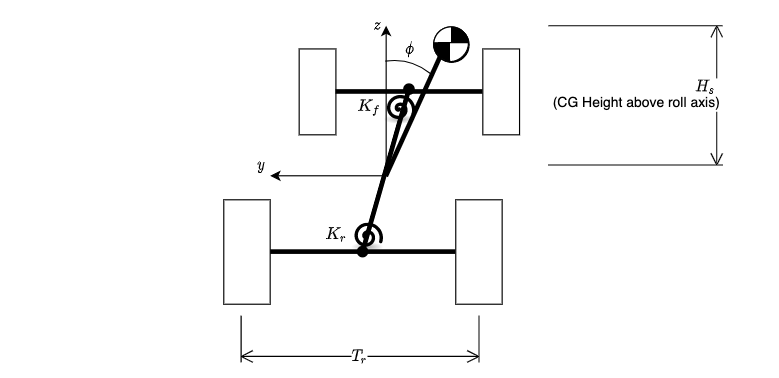

This "inertial reaction force" causes the vehicle to roll to the right (positive roll angle $\phi$ according to the right-hand rule) about its roll axis, which we will assume does not move. If we have information about the *roll stiffness* $K_f$ and $K_r$ of our front and rear suspension, respectively, we can compute the vehicle's total roll angle, including the moment from the offset of the sprung mass due to the roll angle. To do this, we compute a moment balance on the sprung mass about the roll ($x$ or forward) axis, and find, considering CW moments positive via the right-hand rule:

$$\Sigma M_x = 0 = -(K_f + K_r) \phi + m_sH_s \sin \phi + m_s a_y H_s$$

Applying the small angle approximation for $\phi$, we can solve for it. We get:

$$\phi = \frac{m_s a_y H_s}{K_f+K_r - m_sH_s}$$

We can then assume, via Newton's 3rd law, that each axle (front or rear) experiences a reaction moment from its "effective torsional spring" that acts about the axle's roll center. Then, looking at a single axle (in this case, the rear), we can perform a force and moment balance about the vehicle's $x$ direction (forward), assuming for now that the unsprung mass (suspension and wheels) have negligible mass.

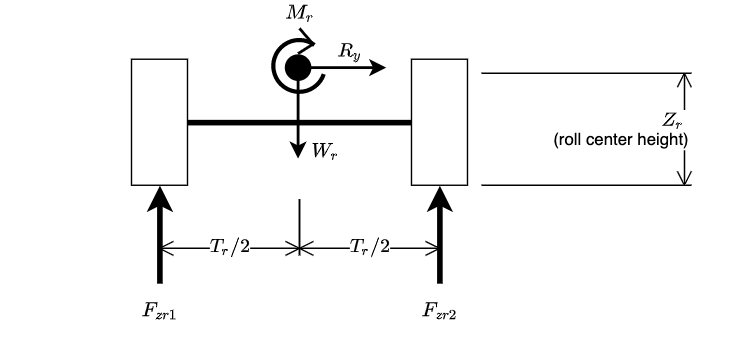

$M_r$ comes from the torsional spring we used to represent the suspension, and has a magnitude of:

$$M_r = K_r \phi$$

$R_{yr}$ comes from the reaction force from this axle's portion of the sprung mass. This reaction force will be proportional to the static weight distribution of the vehicle front-rear, which depends on the distances $a$ and $b$ front the CG to the front and rear axles, respectively. A moment balance on the sprung mass about the vehicle's $y$-direction would tell us that for the rear axle:

$$R_{yr} = \frac{m_s a}{a+b} a_y = \frac{W_r}{g} a_y$$

Applying Newton's second law for moments in the $x$(forward)-direction about the ground at the center of the track,  which indicates that clockwise moments are positive, we can see that:


$$\Sigma M_x = 0 = K_r \phi + \left( F_{zr1} - F_{zr2} \right)\frac{T_r}{2} + R_y Z_r $$

Subbing in our expression $\phi = \frac{m_s a_y H_s}{K_f+K_r - m_s H_s}$, we see that:

$$K_r\frac{m_s a_y H_s}{K_f+K_r - m_sH_s} + \frac{W_r}{g}a_y  = \left( F_{zr2} - F_{zr1} \right)\frac{T_r}{2} $$

Rearranging this equation, we can see that the difference between the left and right vertical forces is given by:

$$ \left( F_{zr2} - F_{zr1} \right)= \frac{2 a_y}{T_r} \left( m_s H_s \underbrace{\frac{K_r}{K_f+K_r - m_sH_s}}_{P_{kr}} + \frac{W_f}{g} Z_r \right) $$

Notice the term $P_{kr}$ called out in the above equation. This is a parameter that [Milliken and Milliken (1995)](https://www.amazon.com/Vehicle-Dynamics-Douglas-Milliken-William/dp/1560915269/ref=sr_1_1?keywords=race+car+vehicle+dynamics&qid=1638741374&sr=8-1) called "Fractional Roll Stiffness." This parameter is interesting because it shows how increasing the roll stiffness on the rear axle (relative to the front) will actually increase the amount of load transfer on the rear tires! This can be accomplished using, for example, an anti-roll bar. Tuning $P_k$ is used to artificially decrease the coefficient of friction on the front or rear axle to "balance" the car and prevent either limit push or limit spin behavior.

A Newton's 2nd law force balance on the rear axle (still assuming that there is no significant unsprung mass) would show that $W_r = F_{zr1}+{F_zr2}$, which can be used to calculate total vertical tire loads.

Milliken and Milliken's formulation for Pair analysis (pg 286) is almost identical to the one we just derived, except that it includes effects from unsprung mass. Unsprung mass was excluded in this derivation for simplicity, but it *is* included in the function below, which implements steady state pair analysis to compute vertical tire loads given a lateral acceleration and vehicle properties. This fills in the "suspension" subsystem model for our vehicle.


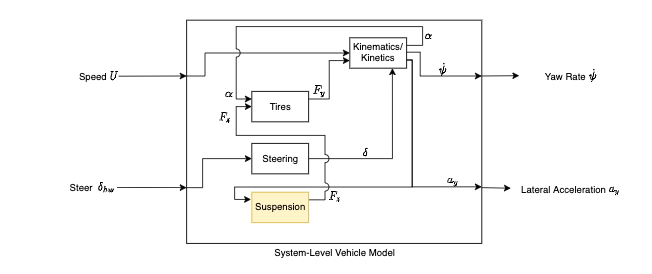

In [36]:
function [Fzf1,Fzf2,Fzr1,Fzr2] = getVerticalLoads(Car,U,R)
    %this function is based on Milliken pg 286
    ay = U^2/R;
    %we will assume LEFT HAND turns positive (symmetry), so positive ay will result in an increase in the RIGHT tire load (tire 2 on each axle)
    
    %compute front axle loads
    Pkf = Car.Krf/(Car.Krf+Car.Krr-(Car.Wsf+Car.Wsr)*Car.Hs);%fractional roll stiffness on this axle.
    dFzf = 2*ay/(Car.Tf*9.81)*(Pkf*Car.Hs*(Car.Wsf+Car.Wsr) + Car.Wsf*Car.Zrf + Car.Wuf*Car.Zuf);
    Fzf1 = (Car.Wuf+Car.Wsf)/2-dFzf;%left front wheel vertical load
    Fzf2 = (Car.Wuf+Car.Wsf)/2+dFzf;%right front wheel vertical load

    %compute rear axle loads
    Pkr = Car.Krr/(Car.Krf+Car.Krr-(Car.Wsf+Car.Wsr)*Car.Hs);%fractional roll stiffness on this axle.
    dFzr = 2*ay/(Car.Tr*9.81)*(Pkr*Car.Hs*(Car.Wsf+Car.Wsr) + Car.Wsr*Car.Zrr + Car.Wur*Car.Zur);
    Fzr1 = (Car.Wur+Car.Wsr)/2-dFzr;%left rear wheel vertical load
    Fzr2 = (Car.Wur+Car.Wsr)/2+dFzr;%right rear wheel vertical load
endfunction

As before, we will use a quick script to test the operation of this function to make sure it produces reasonable results. Because this gives us everything we need to also test our tire force function, we will have the script produce lateral force estimates as well. Note the sign convenction applied to to the tire force function. Our tire force table only includes forces for positive slip angles, but in general, tire forces *oppose* slip angle.

In [37]:
g = 9.81
U = 10;%fwd speed, m/s
R = 20;%turn radius, m
ay_g = U^2/R/g %just to see what this is.... is it realistic?
[Fzf1,Fzf2,Fzr1,Fzr2] = getVerticalLoads(Car,U,R)

V = 0.5;

(Fzf1+Fzf2+Fzr1+Fzr2)/9.81

% Check tire forces
[alpha_f_left,alpha_f_right,alpha_r_left,alpha_r_right] = getSlipAngles(Car,U,R,V,25)
Fyf1 = getTireFy(Fzf1,alpha_f_left,TireData)/sign(alpha_f_left)
Fyf2 = getTireFy(Fzf2,alpha_f_right,TireData)/sign(alpha_f_right)
Fyr1 = getTireFy(Fzr1,alpha_r_left,TireData)/sign(alpha_r_left)
Fyr2 = getTireFy(Fzr2,alpha_r_right,TireData)/sign(alpha_r_right)

(Fyf1+Fyf2+Fyr1+Fyr2)/(Car.m*9.81)

g =  9.8100
ay_g =  0.50968
Fzf1 =  664.61
Fzf2 =  2147.6
Fzr1 =  419.33
Fzr2 =  1084.9
ans =  440.00
alpha_f_left =  0.032115
alpha_f_right =  0.051619
alpha_r_left = 0
alpha_r_right = 0
Fyf1 =  616.35
Fyf2 =  2252.0
Fyr1 = -Inf
Fyr2 = -Inf
ans = -Inf


Results look reasonable, so we're ready!! We can now talk about how to use ALL of these subsystem models to solve for the steering angle and vehicle lateral velocity that will satisfy our Newton's laws equations in the vehicle $y$ direction.

# Solving for steering angle and lateral velocity using a Newton Raphson Algorithm

As we've already seen, our system-level vehicle model includes a lot of coupling between subystems (tires, kinematics, suspension, for example). This means our vehicle can be represented as a system of nonlinear equations... if we want to know about the vehicle's motion given a particular speed and steering wheel position, we need to know vertical tire forces, lateral velocity of the vehicle (for calculating slip angles), yaw rate, and other properties that are all interdependent.

The tire forces determine how fast a car can go around a turn. Tire force is a function of both slip angle and vertical load. Using our suspension model, we can compute vertical loads for each tire given the car's speed (using centripetal acceleration). The tires' slip angles are dependent upon steering, lateral velocity, and yaw rate, as well as vehicle geometry. The only thing we cannot determine on this list a priori is the car's lateral velocity. We also don't know how much steering is required to navigate a particular turn at a particular velocity.

Therefore, we know "everything" we need to know about our vehicle navigating a turn at a particular speed *except for* two "independent" variables:

$$\vec{q} = \begin{bmatrix} \delta_{hw} \\ V \end{bmatrix}$$

If we knew the correct $\vec{q}$, we could say that Newton's laws (sum of forces and sum of moments) for the vehicle navigating a turn of radius $R$ at a constant speed $U$ were satisfied. Newton's Laws in our case represent *constraints* that must be satisfied for the vehicle to be navigating the turn at our chosen speed.

It may seem like a problem that we have two unknowns and a sea of interdependency, but it is actually a good thing that we only have two, since we have two constraint equations! We only have two "adjustable" parameters that are unknown. As it turns out, an iterative method called the [Newton Raphson Method](https://en.wikipedia.org/wiki/Newton%27s_method) can be used to find these inputs' values iteratively. The method is summarized for a problem with 2 unknown parameters and two constraint functions

Given a set of constraint functions:

$$\Phi = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}$$

and a set of generalized "coordinates" or unknown inputs to these constraint functions:

$$q = \begin{bmatrix} q_1 \\ q_2 \end{bmatrix}$$

The Jacobian of the constraint functions is given by:

$$[\Phi_q] = \begin{bmatrix} \frac{\partial f_1}{\partial q_1} & \frac{\partial f_1}{\partial q_2} \\ \frac{\partial f_2}{\partial q_1} & \frac{\partial f_2}{\partial q_2} \end{bmatrix} $$

The Newton Raphson algorithm states that we can iteratively estimate the values of the unknown inputs $q$ by performing:

$$q_k = q_{k-1} - [\Phi_q]_k^{-1} \Phi_k$$

If this converges, it will do so quickly. We can check convergence by looking at the value of the constraint function after each iteration.

For the steady state cornering problem, we can say that our constraint functions come from Newton's laws; the sum of the forces in the y-direction = 0 at steady state, and the sum of the moments in the yaw direction as well.

## Summary

The Newton Raphson Method can be considered as a repeated application of the following steps:

1. Guess values for the function's unknown independent variables (in this case, $\delta_{hw}$ and $V$)
2. Compute the value of the constraint equations with these guesses
3. While the maximum "error" in these constraint equations is greater than some threshold, do steps 4-6
4. Compute the value of the constraint equations with these guesses
5. Find the *Jacobian* (a matrix of slopes or derivatives showing how the constraint equations are each affected by each independent variable) according to $[\Phi_q] = \begin{bmatrix} \frac{\partial f_1}{\partial q_1} & \frac{\partial f_1}{\partial q_2} \\ \frac{\partial f_2}{\partial q_1} & \frac{\partial f_2}{\partial q_2} \end{bmatrix} $
6. Adjust the guesses for the independent variables according to $q_k = q_{k-1} - [\Phi_q]_k^{-1} \Phi_k$

In order to do this, we need to write a few functions to perform each of these steps.

## Function: Calculate Constraints

For this problem, we have two constraint functions, which you will recognize from our Kinetics/Kinematics model.

$$\vec{\Phi} = \begin{bmatrix} F_{yf1}\cos \delta_1 + F_{yf2}\cos \delta_2 + F_{yr1} + F_{yr2} - m\frac{U^2}{R} = 0 \\
a\left(F_{yf1}\cos \delta_1 + F_{yf2}\cos \delta_2\right) + \frac{T_f}{2}\left(F_{yf1}\sin \delta_1 - F_{yf2}\sin \delta_2\right) - b\left(F_{yr1} + F_{yr2}\right) = 0 \end{bmatrix}$$

The first constraint says that the sum of the lateral tire forces must balance the car's centripetal acceleration. The second is similar, but enforces a moment balance about the car's $z$-axis.


In [38]:
function phi = calcPhi(q,Car,U,R)
    
    %pull lateral velocty and HW angle out of the q vector
    V = q(1);
    HW = q(2);
    
    %calculate slip angles
    [alpha_f_left,alpha_f_right,alpha_r_left,alpha_r_right] = getSlipAngles(Car,U,R,V,HW,Car.steer_left,Car.steer_right);
    %calculate vertical tire force
    [Fzf1,Fzf2,Fzr1,Fzr2] = getVerticalLoads(Car,U,R);
    %get steer angles
    [delta_left,delta_right] = getSteerAngles(HW,Car.steer_left,Car.steer_right);
    %now calculate the lateral tire forces
    Fyf1 = -getTireFy(Fzf1,abs(alpha_f_left),Car.TireData)/sign(alpha_f_left);
    Fyf2 = -getTireFy(Fzf2,abs(alpha_f_right),Car.TireData)/sign(alpha_f_right);
    Fyr1 = -getTireFy(Fzr1,abs(alpha_r_left),Car.TireData)/sign(alpha_r_left);
    Fyr2 = -getTireFy(Fzr2,abs(alpha_r_right),Car.TireData)/sign(alpha_r_right);
   
    %now calculate values of each constraint
    phi(1,1) = (Fyf1*cos(delta_left)+Fyf2*cos(delta_right)+Fyr1+Fyr2) - Car.m*U^2/R*sign(HW); %the sum of this should be 0!
    %phi(2,1) = Car.a*(Fyf1*cos(delta_left)+Fyf2*cos(delta_right)) -Car.b*(Fyr1+Fyr2) + Car.Tf/2*(Fyf1*sin(delta_left) - Fyf2*sin(delta_right)); ; %this is the sum of the moments in yaw. Should = 0!!
    phi(2,1) = Car.a*(Fyf1*cos(delta_left)+Fyf2*cos(delta_right)) -Car.b*(Fyr1+Fyr2) ; ; %this is the sum of the moments in yaw. Should = 0!!

endfunction

## Function: Calculate the Jacobian



A [Jacobian Matrix](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) is a matrix that computes each of the first-order partial derivatives (slopes) between a vector-valued functions inputs and outputs. For a function with 2 inputs and 2 outputs, the Jacobian can be written as:

$$[\Phi_q] = \begin{bmatrix} \frac{\partial \Phi_1}{\partial q_1} & \frac{\partial \Phi_1}{\partial q_2} \\ \frac{\partial \Phi_2}{\partial q_1} & \frac{\partial \Phi_2}{\partial q_2} \end{bmatrix} $$

For our system, that means computing the following matrix:

$$[\Phi_q] = \begin{bmatrix} \frac{\partial \Phi_1}{\partial \delta_{hw}} & \frac{\partial \Phi_1}{\partial V} \\ \frac{\partial \Phi_2}{\partial \delta_{hw}} & \frac{\partial \Phi_2}{\partial V} \end{bmatrix} $$

where $\Phi_1,\Phi_2$ are our sum of forces and sum of moments constraint equations, respectively. We can do this numerically (we have no choice, since tire model is a table and not an equation) by perturbing one of the inputs at a time by a *tiny* amount, and calculating the derivative for each of our constraint functions $f$ and each of our inputs $q$ as:

$$\frac{\partial \Phi_i}{\partial q_j} = \frac{\Phi_i(q_j+\epsilon)-\Phi_i(q_j)}{\epsilon}$$

A function that does this is presented below.

In [39]:
function Jac = calcJac(q,Car,U,R)
    %calculate phi once.
    phi = calcPhi(q,Car,U,R);
    eps = .01;%value of perturbation
    for k = 1:length(q)
        %perturb q
        qlocal = q;
        qlocal(k) = qlocal(k)+eps;
        %calculate phi
        philocal = calcPhi(qlocal,Car,U,R);
        %now this column of jacobian is just the approx derivative
        Jac(:,k) = (philocal-phi)/eps;
    end
endfunction

## Function: Iterate Once

With a function to calculate the Jacobian and a function to calculate constraint equations given $\vec{q}$, we are ready to look at a full iteration cycle for the Newton Raphson solution:

In [40]:
function [q,phi] = iterate(q,Car,U,R)
    Jac = calcJac(q,Car,U,R);
    phi = calcPhi(q,Car,U,R);
    q = q - pinv(Jac)*phi;
    phi = calcPhi(q,Car,U,R);
endfunction

## Function: Solve NR

Now that we have a function that performs a single iteration, we are ready to write one that actually solves the Newton Raphson Problem.

In [41]:
function [q,phi,niter] = NRSolve(q,Car,U,R,maxiter)
    thresh=.01;
    phi = calcPhi(q,Car,U,R);
    niter = 0;
    while (max(abs(phi))>thresh)&&(niter<maxiter)
        [q,phi] = iterate(q,Car,U,R);

        phi;
        niter=niter+1;
    end
endfunction

## Test Newton Raphson solution: Solve for $\delta_{hw}$ and V given U,R,Car

The cell below uses ALL of the above functions to find the handwheel angle AND acceleration at a particular speed and particular turn radius for the car. 

In [42]:
% load car data
Car = loadCar('tire_fy.txt','Steer_vs_HandWheel.txt');

% %pick a speed
% U =14.95;
% %pick a radius
% R =20;
%pick a speed
U =13;
%pick a radius
R =20;
%nominal accel in g
ayg = 1/9.81*U^2/R
%quesses for q
steerangle_guess = (Car.a+Car.b)/R * Car.Steer_Ratio_Approx *180/pi
qguess = [0;steerangle_guess];

maxiter = 20;

[q,phi,niter] = NRSolve(qguess,Car,U,R,maxiter);
q
phi
niter



ayg =  0.86137
steerangle_guess =  51.566
q =

    0.29279
   69.84770

phi =

  -2.5430e-04
   4.1781e-05

niter =  6


# Find Max Speed around a Given Turn of Radius "R"

Now, we will use our model, which finds a steering wheel angle $\delta_{hw}$ and a vehicle lateral velocity $V$ that satisfy our Newton's Laws constraints, as a means to find the maximum speed $U$ that our car can traverse a given turn. This is what you came here for! This model will have the following total structure:

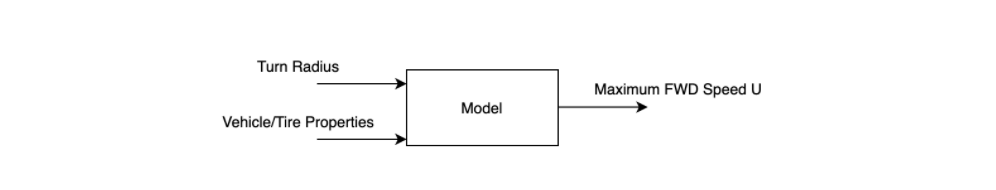
To do this, we will create an initial guess for our maximum speed (we can use something safe for this in terms of lateral acceleration). Then, if the solver is able to find a reasonable steering wheel angle and lateral velocity, we will attempt to calculate the steering wheel angle and lateral velocity at a very high speed. If the solver reaches its maximum number of iterations, OR if the steering wheel angle is greater than 180 degrees (our maximum), we will back the speed off by 1/2 of the difference between our "safe" and "high" speeds. We will continue this until the change in speed is less than a threshold (say, .1 m/s), which indicates that we have found our maximum. This is related to what's called the [bisection method](https://en.wikipedia.org/wiki/Bisection_method) of root finding.

In [43]:
function [Umax,aymax,delta,V] = findMaxSpeed(Car,mumax,R,thresh)
    g = 9.81;
    %find initial speed guess
    ayguess = mumax/2*g;
    ayguess/g;
    U = sqrt(ayguess*R);
    Ulast = 0;
    %keep track of how many iterations this solver used
    speediter = 0;

    %set max iterations for newton raphson
    maxiter = 20;

    done = false;
    %iterate on speed
    while ~done
        speediter = speediter+1
        %quesses for q based on ackermann angle
        steerangle_guess = (Car.a+Car.b)/R * Car.Steer_Ratio_Approx *180/pi;
        %initial guess for parameters V and handwheel
        qguess = [0;steerangle_guess];
        [q,phi,niter] = NRSolve(qguess,Car,U,R,maxiter);
        hw = q(2);%keep track of handwheel solution
        if((abs(hw)<180) && (niter<maxiter)) %this is a good solution, so increment U
            Udiff = (U-Ulast);
            if abs(Udiff)<thresh
                done = true;
            else
                Ulast = U;
                U = U + abs(Udiff)/2;
%                 disp('increased U');
            end
        else
            Udiff = (U-Ulast);
            Ulast = U;
            U = U - abs(Udiff)/2;
%             disp('decreased U');
        end
    end

    Umax = U;
    aymax = U^2/R/g;
    delta = q(2);
    V = q(1);
    disp(['completed in: ' num2str(speediter) ' iterations'])
endfunction

This function is slow, and could be VASTLY improved with a gradient-based method, but it should get us an answer! Let's see how it works.

In [44]:
Car = loadCar('tire_fy.txt','Steer_vs_HandWheel.txt');

R = 20; %meters, turn radius
Uthresh = 0.1;%threshold for speed solution
mumax = 1.5; %guess for maximum accel

[Umax,aymax,delta,V] = findMaxSpeed(Car,mumax,R,Uthresh)

speediter =  1
speediter =  2
speediter =  3
speediter =  4
speediter =  5
speediter =  6
speediter =  7
speediter =  8
speediter =  9
speediter =  10
completed in: 10 iterations
Umax =  14.429
aymax =  1.0611
delta =  106.27
V =  0.094225


For the configuration we tried, we got a number for the car's lateral velocity, the required steering angle, and the maximum speed for this turn radius. The numbers look reasonable! Let's see how we can use this model to help us make design decisions.

# Case Study: Maximum speed vs. turn radius

Maybe you have tried to optimize your vehicle's steering geometry for a particular turn radius that is common on your race track. What would the effects of turn radius on your vehicle's performance look like?

ans =  20
speediter =  1
speediter =  2
speediter =  3
speediter =  4
speediter =  5
speediter =  6
speediter =  7
speediter =  8
speediter =  9
speediter =  10
completed in: 10 iterations
Umax =  14.429
aymax =  1.0611
delta =  106.27
V =  0.094225
ans =  25
speediter =  1
speediter =  2
speediter =  3
speediter =  4
speediter =  5
speediter =  6
speediter =  7
speediter =  8
speediter =  9
completed in: 9 iterations
Umax =  16.158
aymax =  1.0646
delta =  102.43
V = -0.059039
ans =  30
speediter =  1
speediter =  2
speediter =  3
speediter =  4
speediter =  5
speediter =  6
speediter =  7
speediter =  8
speediter =  9
completed in: 9 iterations
Umax =  17.701
aymax =  1.0646
delta =  90.082
V = -0.17981
ans =  35
speediter =  1
speediter =  2
speediter =  3
speediter =  4
speediter =  5
speediter =  6
speediter =  7
speediter =  8
speediter =  9
completed in: 9 iterations
Umax =  19.119
aymax =  1.0646
delta =  82.919
V = -0.28305


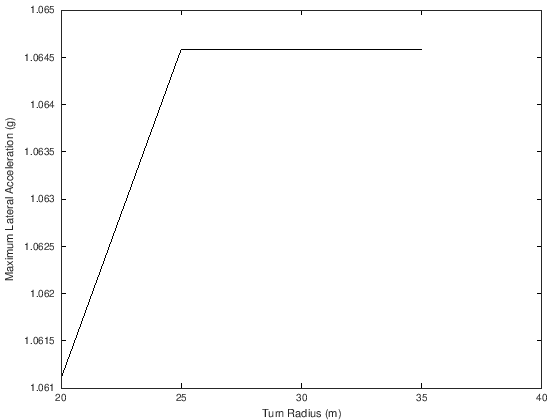

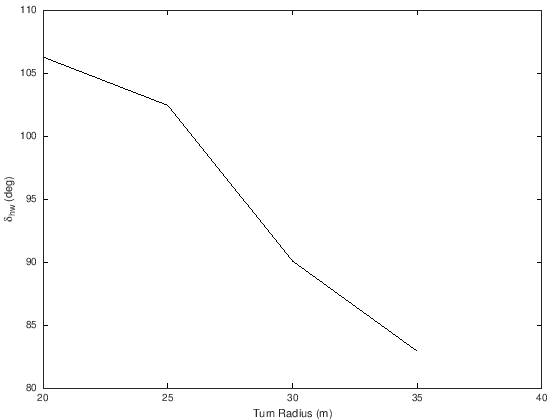

In [45]:
Car = loadCar('tire_fy.txt','Steer_vs_HandWheel.txt');
Uthresh = 0.2;
Rvec = [20 25 30 35];
mumax = 1.5;

for k = 1:length(Rvec)
    Rvec(k)
    [Umax,aymax,delta,V] = findMaxSpeed(Car,mumax,Rvec(k),Uthresh)
    Uvec(k) = Umax;
    ayvec(k) = aymax;
    deltavec(k) = delta;
    Vvec(k) = V;
end


figure
plot(Rvec,ayvec,'k')
xlabel('Turn Radius (m)')
ylabel('Maximum Lateral Acceleration (g)')

figure
plot(Rvec,deltavec,'k')
xlabel('Turn Radius (m)')
ylabel('\delta_{hw} (deg)')

# Case Study: Balancing Roll Stiffnesses

Let's assume you had a nominal car configuration, and you wanted to compare how the car performs with and without an anti-roll bar on the rear suspension. Let's assume the anti-roll bar in the rear adds 50% to the rear roll stiffness. How might this affect our vehicle's performance around a particular turn?

In [46]:
Car = loadCar('tire_fy.txt','Steer_vs_HandWheel.txt');

R = 20; %meters, turn radius
Uthresh = 0.1;%threshold for speed solution
mumax = 1.5; %guess for maximum accel

[Umax,aymax,delta,V] = findMaxSpeed(Car,mumax,R,Uthresh);
disp(['without rear anti-roll bar: ' num2str(aymax) ' g is max accel'])

Car.Krr = Car.Krr*1.5;

[Umax,aymax,delta,V] = findMaxSpeed(Car,mumax,R,Uthresh);
disp(['with rear anti-roll bar: ' num2str(aymax) ' g is max accel'])

speediter =  1
speediter =  2
speediter =  3
speediter =  4
speediter =  5
speediter =  6
speediter =  7
speediter =  8
speediter =  9
speediter =  10
completed in: 10 iterations
without rear anti-roll bar: 1.0611 g is max accel
speediter =  1
speediter =  2
speediter =  3
speediter =  4
speediter =  5
speediter =  6
speediter =  7
speediter =  8
completed in: 8 iterations
with rear anti-roll bar: 1.0716 g is max accel


As you can see, the car is more capable with the anti-roll bar. this is because while the car will tend to "push" at the limit because it is front-heavy, making the tires less efficient than their nominal friction, adding roll stiff ness in the rear can balance the car, making the tires saturate at closer to the same lateral acceleration. This results in a car that is faster around this turn!